In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import seaborn as sns; sns.set()
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='da06919089954d6395139775f24cc770',client_secret='7b718f878b094f08bf945cb9663bbbb3',redirect_uri='http://127.0.0.1:9090', scope='user-top-read',username='jwhandley'))

In [2]:
uk_top_50 = sp.playlist_tracks('37i9dQZEVXbLnolsZ8PSNw')['items']
uk_top_50 = {uk_top_50[i]['track']['name']:uk_top_50[i]['track']['id'] for i in range(50)} 

us_top_50 = sp.playlist_tracks('37i9dQZEVXbLRQDuF5jeBp')['items']
us_top_50 = {us_top_50[i]['track']['name']:us_top_50[i]['track']['id'] for i in range(50)} 

my_top_50 = sp.current_user_top_tracks(limit=50)['items']
my_top_50 = {my_top_50[i]['name']: my_top_50[i]['id'] for i in range(50)} 

top_tracks = {'US Top 50': us_top_50,
              'UK Top 50': uk_top_50,
              'My Top 50': my_top_50}

for id in top_tracks['US Top 50'].values:
    sp.audio_features(i)

TypeError: 'builtin_function_or_method' object is not iterable

Text(0.5, 1.0, 'Audio features of top 50 tracks by playlist')

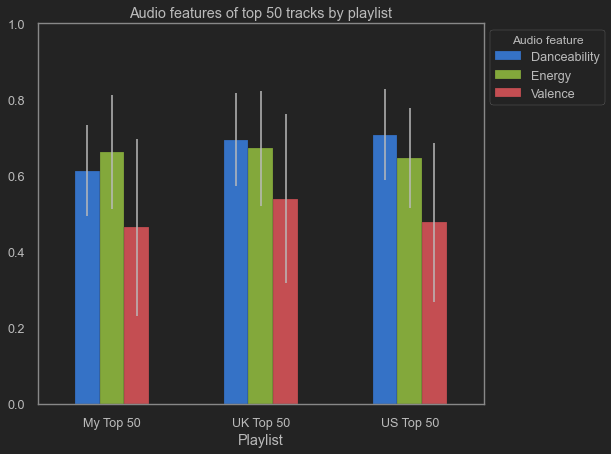

In [15]:
top_track_features = dict.fromkeys(['US Top 50','UK Top 50','My Top 50'])
for playlist in ['US Top 50','UK Top 50','My Top 50']:
    audio_features = sp.audio_features(list(top_tracks[playlist].values()))
    top_track_features[playlist] = {key.title(): [audio_features[i][key] for i in range(50)] for key in ['danceability','energy','loudness','acousticness','valence','tempo']}

my_features = pd.DataFrame().from_dict(top_track_features['My Top 50'])
my_features['Playlist'] = 'My Top 50'

us_features = pd.DataFrame().from_dict(top_track_features['US Top 50'])
us_features['Playlist'] = 'US Top 50'

uk_features = pd.DataFrame().from_dict(top_track_features['UK Top 50'])
uk_features['Playlist'] = 'UK Top 50'

features = pd.concat([my_features,us_features,uk_features])

features.groupby('Playlist').mean()[['Danceability','Energy','Valence']].plot.bar(yerr=features.groupby('Playlist').std()[['Danceability','Energy','Valence']])
plt.axis([-0.5,2.5,0,1])
plt.xticks([0,1,2],['My Top 50','UK Top 50','US Top 50'],rotation=0)
plt.legend(['Danceability','Energy','Valence'],loc='upper left',bbox_to_anchor=(1,1),title='Audio feature')
plt.xlabel('Playlist')
plt.title('Audio features of top 50 tracks by playlist')

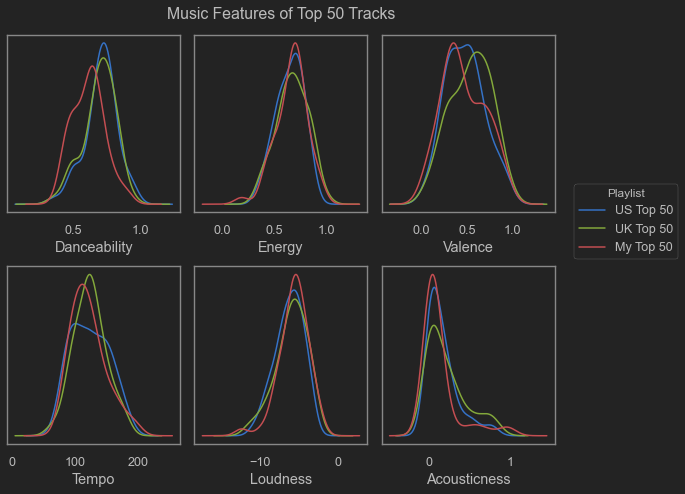

In [5]:
fig, axs = plt.subplots(nrows=2,ncols=3)
for idx, feature in enumerate(['Danceability','Energy','Valence','Tempo','Loudness','Acousticness']):
    for playlist in ['US Top 50','UK Top 50','My Top 50']:
        features.query(f'Playlist=="{playlist}"')[feature].plot.kde(label=playlist,ax=axs[int(idx>2),idx % 3])
        axs[int(idx>2),idx % 3].set_ylabel('')
        axs[int(idx>2),idx % 3].set_yticks([])
        axs[int(idx>2),idx % 3].set_xlabel(feature)
        if feature in ['danceability','energy','valence','acousticness']:
            axs[int(idx>2),idx % 3].set_xticks([0,0.5,1])


plt.tight_layout()
plt.legend(bbox_to_anchor=(1.75,1.5),title='Playlist')
plt.suptitle('Music Features of Top 50 Tracks')
plt.subplots_adjust(top=0.925)